### **REVISED TOPIC: IDENTIFYING DOG BREEDS BY OVERLAYING BREED NAMES ON THEIR IMAGES**

---



# DATASET PREPARATION AND LIBRARY INSTALLATION

 CLONING THE REPOSITORY FILE






In [ ]:
!git clone https://github.com/Astrid-Lubang/MeXE402_FINALS_-LUBANGASTRIDCLAIRE_MUNOZFLORIANE.git
%cd FINALS_ELECTIVES_DATASET/
from IPython.display import clear_output
clear_output()

INSTALL AND IMPORT NEEDED LIBRARIES

In [ ]:
!pip install opencv-python-headless matplotlib
!pip install opencv-python
!pip install matplotlib



In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from tensorflow.keras.preprocessing import image


# IMAGE VISUALIZATION
IMAGE PREPROCESSING

In [ ]:
# List files in the directory where the image is supposed to be
os.listdir('MeXE402_FINALS_-LUBANGASTRIDCLAIRE_MUNOZFLORIANE/PART 2/DOG_BREED_DATSASET')


['YORKSHIRE_TERRIER',
 'BOXER',
 'ROTTWEILER',
 'LABRADOR_RETRIEVER',
 'GERMAN_SHEPHERD',
 'BULLDOG',
 'DACHSCHUND',
 'BEAGLE',
 'GOLDEN_RETRIEVER',
 'POODLE']

# ENHANCED MODEL TRAINING PIPELINE

MODEL TRAINING WITH MOBILENETV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 with pre-trained weights, excluding the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Build the new model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling instead of Flatten
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Replace 10 with the number of breeds
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the image data generator for training
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# Path to your training data directory
train_generator = train_datagen.flow_from_directory(
    'MeXE402_FINALS_-LUBANGASTRIDCLAIRE_MUNOZFLORIANE/PART 2/DOG_BREED_DATSASET',  # Correct path
    target_size=(224, 224),
    batch_size=32,  # Adjust batch size for faster training
    class_mode='categorical'
)
# Train the model
model.fit(train_generator, epochs=5)  # Use fewer epochs for quick training


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 967 images belonging to 10 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5574 - loss: 1.3575
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9952 - loss: 0.0558
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 1.0000 - loss: 0.0178
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 1.0000 - loss: 0.0092
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 0.0062


In [ ]:
# Save the trained model
model.save('dog_breed_classifier.h5')


BREED PREDICTION

In [ ]:

def predict_breed(model, img_path, class_indices):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    predictions = model.predict(img_array)
    breed_index = np.argmax(predictions)
    breed_name = list(class_indices.keys())[list(class_indices.values()).index(breed_index)]

    return breed_name, predictions[0]


In [ ]:
class_indices = train_generator.class_indices


# MODEL PREDICTION

VISUALIZATION FOR DOG IMAGES

In [ ]:
def display_prediction(img_path, breed_name, text_x=10, text_y=30):
    """
    Display the image with the breed name as the title, allowing for text positioning.

    Parameters:
    - img_path: Path to the image file.
    - breed_name: Predicted breed name.
    - text_x: x-coordinate for text position (default is 10).
    - text_y: y-coordinate for text position (default is 30).
    """
    # Replace underscores with spaces in the breed name
    breed_name = breed_name.replace('_', ' ')

    # Load and display the image
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')

    # Adjust the text position
    plt.text(
        text_x, text_y, breed_name,
        fontsize=15, color='white', backgroundcolor='black'
    )
    plt.show()


# EVALUATION

PREDICITING AND DISPLAYING DOG BREED IMAGE

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


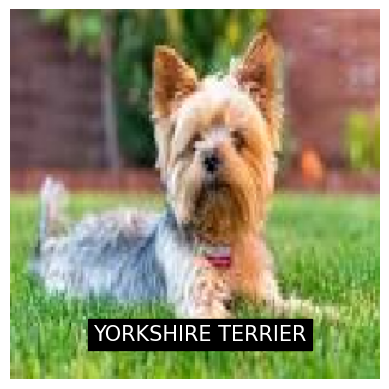

In [ ]:
# Example image path
img_path = '/content/MeXE402_FINALS_-LUBANGASTRIDCLAIRE_MUNOZFLORIANE/PART 2/DOG_BREED_DATSASET/YORKSHIRE_TERRIER/Yorkshire Terrier_34.jpg'

if os.path.exists(img_path):
    # Predict the breed
    breed_name, probabilities = predict_breed(model, img_path, class_indices)

    # Display prediction with custom text position
    display_prediction(img_path, breed_name, text_x=50, text_y=200)
else:
    print(f"Error: The file {img_path} does not exist.")
